In [1]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('data.csv')
df.dropna(inplace=True)

In [62]:
df

,Latitude,Longitude,Category
0,40.7128,-74.0060,Category 1
1,34.0522,-118.2437,Category 2
2,41.8781,-87.6298,Category 3
3,37.7749,-122.4194,Category 1
4,47.6062,-122.3321,Category 2


In [63]:
df["Category"] = df["Category"].map({'Category 1': 1, 'Category 2': 2, 'Category 3': 3})
df["Category"].unique()

array([1, 2, 3], dtype=int64)

In [64]:
df.head()

,Latitude,Longitude,Category
0,40.7128,-74.0060,1
1,34.0522,-118.2437,2
2,41.8781,-87.6298,3
3,37.7749,-122.4194,1
4,47.6062,-122.3321,2


In [65]:
from sklearn.cluster import KMeans

In [66]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [67]:
kmeans.labels_

array([0, 1, 2, 1, 1])

In [68]:
clusters = kmeans.labels_
df

,Latitude,Longitude,Category
0,40.7128,-74.0060,1
1,34.0522,-118.2437,2
2,41.8781,-87.6298,3
3,37.7749,-122.4194,1
4,47.6062,-122.3321,2


In [69]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(df, clusters)

print("Silhouette score:", silhouette_avg)

Silhouette score: 0.4245608767991964


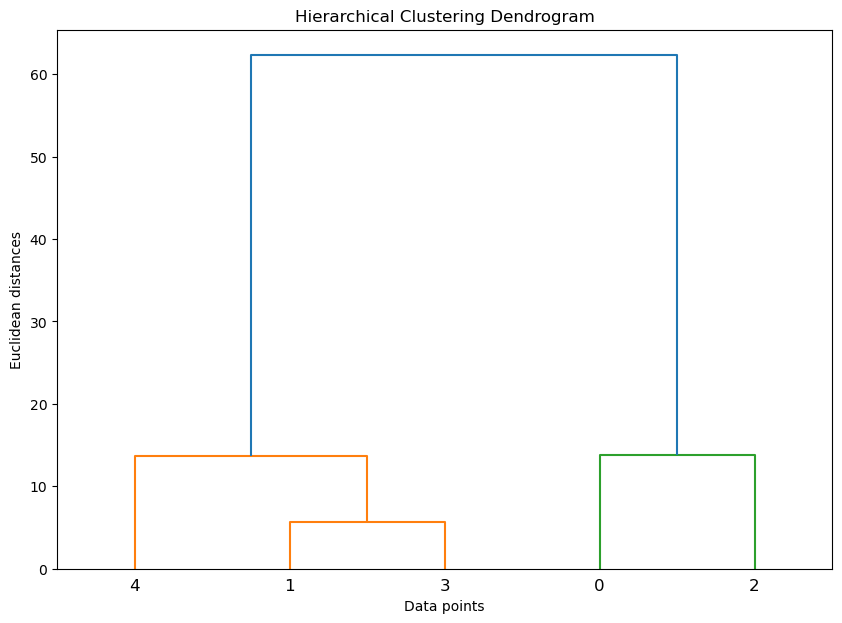

In [70]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df.index, distance_sort='ascending', truncate_mode='level', p=3)
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [71]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [72]:
iris_data = load_iris()
data = iris_data.data
target = iris_data.target

In [73]:
# Standardize the features
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [74]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.labels_

In [75]:
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette score for K-means clustering:", silhouette_avg)

Silhouette score for K-means clustering: 0.45994823920518635


In [76]:
inertia = []
for n in range(2,10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data)
    loss = kmeans.inertia_
    inertia.append(loss)

In [77]:
import matplotlib.pyplot as plt

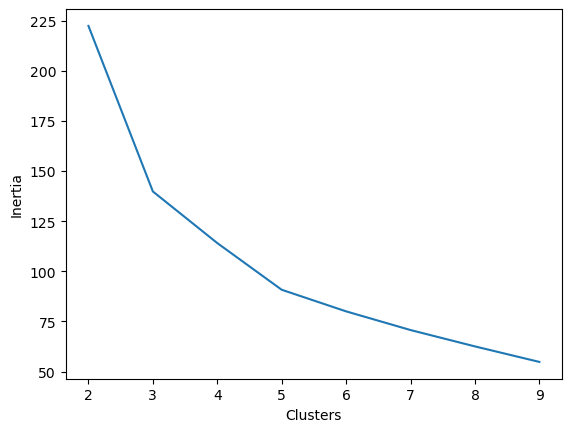

In [78]:
plt.plot(range(2, 10), inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [79]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine_data = load_wine()
data = wine_data.data
target = wine_data.target

# Standardize the features
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [80]:
from sklearn.cluster import DBSCAN
# Initialize the DBSCAN model with the desired parameters
dbscan = DBSCAN(eps=2.2, min_samples=5)

# Fit the model to the data and get the cluster assignments for each data point
cluster_labels = dbscan.fit_predict(data)

# Compute the silhouette score (excluding noise points)
silhouette_avg = silhouette_score(data[cluster_labels != -1], cluster_labels[cluster_labels != -1])
print("Silhouette score for DBSCAN clustering:", silhouette_avg)

Silhouette score for DBSCAN clustering: 0.34801201341316823


In [81]:
cluster_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1], dtype=int64)

In [82]:
dbscan.n_features_in_

13

In [83]:
clusters = pd.DataFrame({"Clusters": cluster_labels})
data = pd.DataFrame(data)

In [84]:
data = pd.concat([data, clusters], axis=1)

In [85]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,Clusters
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,-1


In [86]:
type(data)

pandas.core.frame.DataFrame